Training ------------
Epoch 1/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.3434 - acc: 0.9045
Epoch 2/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.1947 - acc: 0.9438
Epoch 3/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.1587 - acc: 0.9537
Epoch 4/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.1393 - acc: 0.9601
Epoch 5/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.1262 - acc: 0.9640
Epoch 6/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.1174 - acc: 0.9667
Epoch 7/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.1103 - acc: 0.9690
Epoch 8/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.1035 - acc: 0.9711
Epoch 9/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.0986 - acc: 0.9729
Epoch 10/100
60000/60000 [==============================] - 3s 44us/s

60000/60000 [==============================] - 2s 40us/step - loss: 0.0331 - acc: 0.9926
Epoch 82/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.0321 - acc: 0.9927
Epoch 83/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.0325 - acc: 0.9928
Epoch 84/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.0319 - acc: 0.9929
Epoch 85/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.0313 - acc: 0.9932
Epoch 86/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.0321 - acc: 0.9930
Epoch 87/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.0311 - acc: 0.9932
Epoch 88/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.0318 - acc: 0.9927
Epoch 89/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.0309 - acc: 0.9929
Epoch 90/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.0298 - acc: 

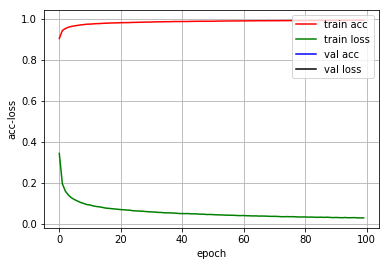

511.87478200000004


In [2]:
import numpy as np
np.random.seed(1337)  # for reproducibility
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
%matplotlib inline
from keras.callbacks import Callback
import time
import matplotlib.image as pimg
start = time.clock()
#-------------------------------------------------------------
#下载数据
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#--------------------------------------------------------------
# 数据预处理
X_train = X_train.reshape(X_train.shape[0], -1) / 255.   # normalize
X_test = X_test.reshape(X_test.shape[0], -1) / 255.      # normalize
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)
#-------------------------------------------------------------

#-------------------------------------------------------------
#写一个LossHistory类，保存loss和acc
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()
#-------------------------------------------------------------------------
# 建立神经网络
model = Sequential([
    Dense(32, input_dim=784,name='Dense_1'),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
#--------------------------------------------------------------------------
# 优化函数
rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
#--------------------------------------------------------------------------
# 编译
model.compile(optimizer=rmsprop,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#--------------------------------------------------------------------------
#创建一个实例history
history = LossHistory()

#--------------------------------------------------------------------------
# 训练
print('Training ------------')
model.fit(X_train, y_train, epochs=100,batch_size=32,callbacks=[history])
#--------------------------------------------------------------------------
#测试评价
print('\nTesting ------------')
loss, accuracy = model.evaluate(X_test, y_test)
#---------------------------------------------------------------------------
print('test loss: ', loss)
print('test accuracy: ', accuracy)
#---------------------------------------------------------------------------
#绘制acc-loss曲线
history.loss_plot('epoch')
#----------------------------------------------------------------------------
#----------------------------------------------------------------------------
#运行时间
end = time.clock()
print(str(end-start))